In [1]:
#main
import pandas as pd
import numpy as np
import math
import sklearn

#graphic
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#specific
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from random import randint
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

#options
pd.set_option('display.max_columns', None) #show all the columns
pd.set_option('display.max_rows', None) #show all the rows


# Load the data

In [2]:
movies = pd.read_csv('./movies_treated.csv')


In [3]:
movies.dtypes

Unnamed: 0                                     int64
title                                         object
movie_id                                      object
movie_imdb_link                               object
certificate                                   object
runtime_in_mins                              float64
genre                                         object
imdb_rating                                  float64
number_of_votes                                int64
metascore                                      int64
top_director                                  object
release_year                                   int64
awards_link                                   object
awards_total                                  object
top_writer                                    object
top_star_1                                    object
top_star_2                                    object
top_star_3                                    object
num_user_reviews                             f

In [4]:
movies.isna().sum().sum()

0

In [5]:
cols_object = ['release_year','release_month', 'release_weekday']

movies[cols_object] = movies[cols_object].astype(object)

In [6]:
movies.isna().sum().sum()

0

In [7]:
movies.shape

(893, 47)

In [8]:
movies.head(2)

,Unnamed: 0,title,movie_id,movie_imdb_link,certificate,runtime_in_mins,genre,imdb_rating,number_of_votes,metascore,top_director,release_year,awards_link,awards_total,top_writer,top_star_1,top_star_2,top_star_3,num_user_reviews,num_critic_reviews,release_date,country_of_origin,top_production_company,budget_in_usd,opening_weekend_us_can_in_usd,gross_us_can_in_usd,gross_worldwide_in_usd,total_award_nominations,total_award_wins,primary_genre,secondary_genre,release_weekday,release_month,oscar_win,oscar_nomination,total_oscar_wins_top_star_1,total_oscar_nominations_top_star_1,total_oscar_wins_top_star_2,total_oscar_nominations_top_star_2,total_oscar_wins_top_star_3,total_oscar_nominations_top_star_3,summed_oscar_wins_stars,summed_oscar_nominations_stars,stars_own_or_won_an_oscar_before_or_after,is_among_best_director,top_production_company_grouped,country_of_origin_grouped
0,0,Spider-Man: No Way Home,tt10872600,https://www.imdb.com/title/tt10872600/?ref_=ad...,+13/14,148.0,"Action, Adventure, Fantasy",8.3,739086,71,Jon Watts,2021,https://www.imdb.com/title/tt10872600/awards/?...,Showing all 34 wins and 66 nominations,Chris McKenna,Tom Holland,Zendaya,Benedict Cumberbatch,6100.0,412.0,2021-12-17,United States,Columbia Pictures,200000000.0,260138569.0,814115070.0,1.916279e+09,66.0,34.0,Action,Adventure,5,12.0,N,N,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,N,N,Columbia Pictures,United States
1,1,Dune,tt1160419,https://www.imdb.com/title/tt1160419/?ref_=adv...,+13/14,155.0,"Action, Adventure, Drama",8.0,621069,74,Denis Villeneuve,2021,https://www.imdb.com/title/tt1160419/awards/?r...,Showing all 164 wins and 280 nominations,Jon Spaihts,Timothée Chalamet,Rebecca Ferguson,Zendaya,5600.0,509.0,2021-10-22,Canada,Warner Bros.,165000000.0,41011174.0,108327830.0,4.018479e+08,280.0,164.0,Action,Adventure,5,10.0,N,Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,Y,Warner Bros.,Other


In [9]:
movies.columns

Index(['Unnamed: 0', 'title', 'movie_id', 'movie_imdb_link', 'certificate',
       'runtime_in_mins', 'genre', 'imdb_rating', 'number_of_votes',
       'metascore', 'top_director', 'release_year', 'awards_link',
       'awards_total', 'top_writer', 'top_star_1', 'top_star_2', 'top_star_3',
       'num_user_reviews', 'num_critic_reviews', 'release_date',
       'country_of_origin', 'top_production_company', 'budget_in_usd',
       'opening_weekend_us_can_in_usd', 'gross_us_can_in_usd',
       'gross_worldwide_in_usd', 'total_award_nominations', 'total_award_wins',
       'primary_genre', 'secondary_genre', 'release_weekday', 'release_month',
       'oscar_win', 'oscar_nomination', 'total_oscar_wins_top_star_1',
       'total_oscar_nominations_top_star_1', 'total_oscar_wins_top_star_2',
       'total_oscar_nominations_top_star_2', 'total_oscar_wins_top_star_3',
       'total_oscar_nominations_top_star_3', 'summed_oscar_wins_stars',
       'summed_oscar_nominations_stars',
       'stars_o

# Pre-model steps

## Check multicollinearity

In [10]:
numericals_df=movies.select_dtypes(np.number)
categoricals_df=movies.select_dtypes(object)


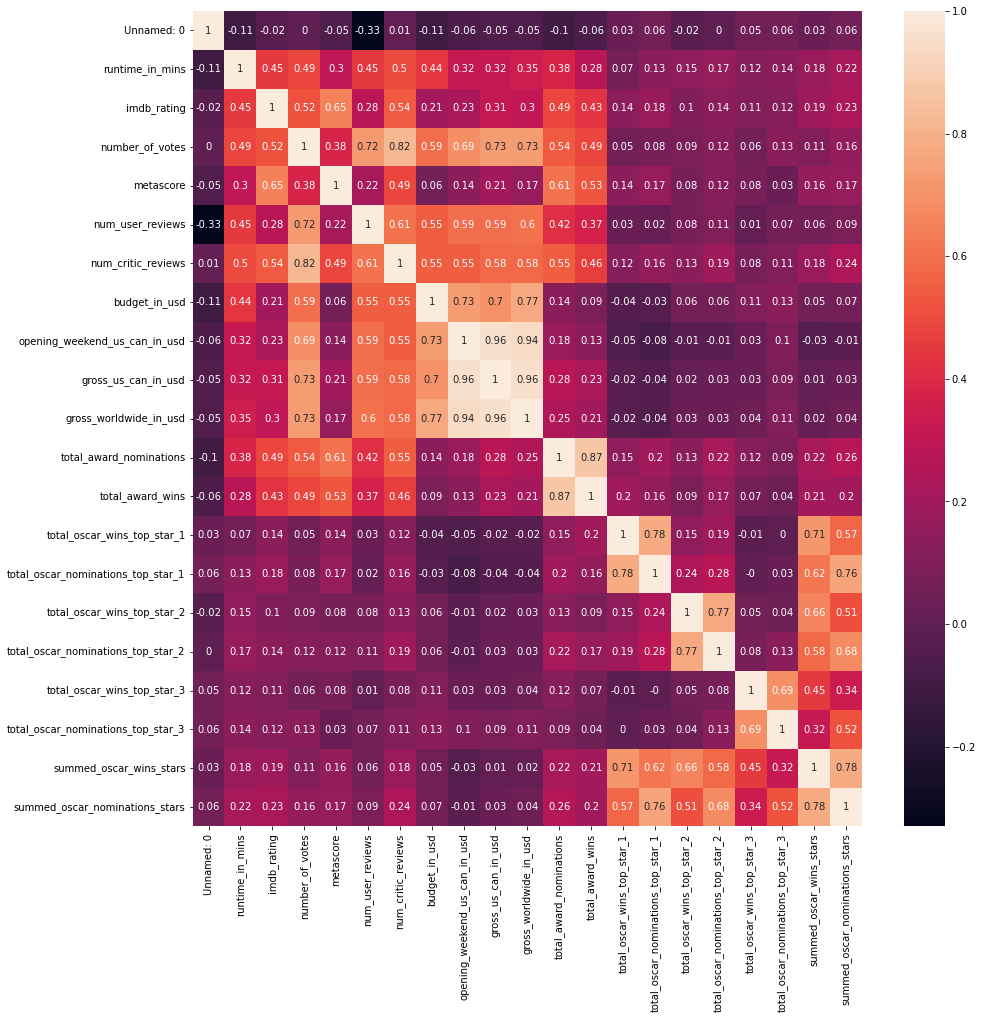

In [11]:
fig, ax = plt.subplots(figsize=(15,15)) #First we have to use plt.subplots to create plot environment.
ax=sns.heatmap(round(numericals_df.corr(),2), annot=True)
plt.show()

## X-y split

In [12]:
X = movies[['runtime_in_mins','imdb_rating', 'number_of_votes','metascore',
       'num_user_reviews', 'num_critic_reviews','budget_in_usd', 'total_award_nominations', 'total_award_wins',
       'primary_genre', 'secondary_genre', 'release_weekday', 'release_month','is_among_best_director',
       'top_production_company_grouped', 'country_of_origin_grouped']]

y= movies['gross_worldwide_in_usd']

display(y.shape)
display(X.shape)

(893,)

(893, 16)

In [13]:
X.isna().sum().sum()

0

In [14]:
X_corr = movies[['runtime_in_mins','imdb_rating', 'number_of_votes','metascore',
       'num_user_reviews', 'num_critic_reviews','budget_in_usd', 'total_award_nominations', 'total_award_wins',
        'summed_oscar_wins_stars','summed_oscar_nominations_stars',
       'gross_worldwide_in_usd']]

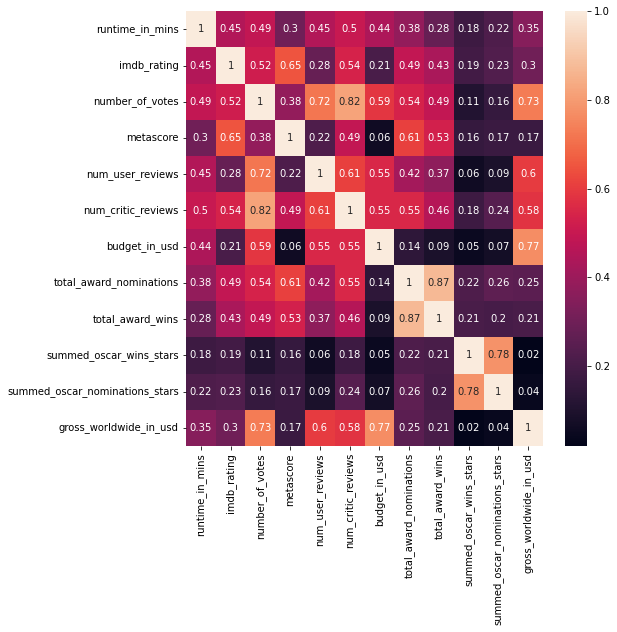

In [15]:
fig, ax = plt.subplots(figsize=(8,8)) #First we have to use plt.subplots to create plot environment.
ax=sns.heatmap(round(X_corr.corr(),2), annot=True)
plt.show()

## Train - test split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Numerical Categorical Split

In [17]:
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

# Modeling

## Linear Regression Model

### Scale & Encode

In [18]:
scaler = MinMaxScaler().fit(X_train_num)
encoder = OneHotEncoder().fit(X_train_cat)

In [19]:
def transform(dataframe):
    # This function assumes that you have initialized a scaler and an encoder, based on the training data
    cat = dataframe.select_dtypes(include = object)
    num = dataframe.select_dtypes(include = np.number)

    if not cat.empty:
        cat_transformed = encoder.transform(cat)
        cat_transformed = cat_transformed.toarray()
        cat_new = pd.DataFrame(data = cat_transformed, columns = encoder.get_feature_names_out())
    else: 
        cat_new = cat
    
    if not num.empty:
        num_transformed = scaler.transform(num)
        num_new = pd.DataFrame(data = num_transformed, columns = num.columns)
    else:
        num_new = num
    
    return pd.concat([cat_new, num_new], axis = 1)


In [20]:
X_train = transform(X_train)
X_test = transform(X_test)

In [21]:
X_train.isna().sum().sum()

0

In [22]:
X_train.head()

,primary_genre_Action,primary_genre_Adventure,primary_genre_Animation,primary_genre_Biography,primary_genre_Comedy,primary_genre_Crime,primary_genre_Drama,primary_genre_Horror,primary_genre_Other,secondary_genre_Adventure,secondary_genre_Comedy,secondary_genre_Crime,secondary_genre_Drama,secondary_genre_Horror,secondary_genre_Other,secondary_genre_Romance,secondary_genre_Thriller,release_weekday_1,release_weekday_2,release_weekday_3,release_weekday_4,release_weekday_5,release_weekday_6,release_weekday_7,release_month_1.0,release_month_2.0,release_month_3.0,release_month_4.0,release_month_5.0,release_month_6.0,release_month_7.0,release_month_8.0,release_month_9.0,release_month_10.0,release_month_11.0,release_month_12.0,is_among_best_director_N,is_among_best_director_Y,top_production_company_grouped_Columbia Pictures,top_production_company_grouped_Other,top_production_company_grouped_Paramount Pictures,top_production_company_grouped_Universal Pictures,top_production_company_grouped_Warner Bros.,country_of_origin_grouped_Other,country_of_origin_grouped_United States,runtime_in_mins,imdb_rating,number_of_votes,metascore,num_user_reviews,num_critic_reviews,budget_in_usd,total_award_nominations,total_award_wins
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.415094,0.793651,0.038818,0.865169,0.028233,0.323111,0.033681,0.501312,0.421260
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.292453,0.841270,0.220519,0.752809,0.056377,0.506024,0.491559,0.144357,0.129921
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.311321,0.714286,0.006784,0.471910,0.010620,0.038335,0.014017,0.013123,0.019685
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.216981,0.619048,0.001320,0.449438,0.001416,0.016429,0.004186,0.000000,0.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.245283,0.412698,0.055267,0.269663,0.020444,0.276013,0.140425,0.044619,0.027559


### Model & Metrics

In [23]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.7947283334079515

In [24]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.6370679525420267

In [25]:
y_test[:10]

710         7095.0
440    180419276.0
525     40140972.0
721    180563636.0
39     408909929.0
290    214215889.0
300    349546142.0
333    132675864.0
208      2576990.0
136    195320400.0
Name: gross_worldwide_in_usd, dtype: float64

In [26]:
predictions_test[:10]


array([ 3.70933760e+07,  9.98113280e+07,  3.03431680e+07,  4.13401088e+08,
        2.82853376e+08,  1.31727360e+08,  3.38886656e+08,  2.56442368e+08,
       -4.63994880e+07,  1.05709568e+08])

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

def scores(model, X, y):
    predictions = lm.predict(X)

    r2 = r2_score(y, predictions)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    rmse = sqrt(mse)

    return r2, mse, mae, rmse

In [28]:
def print_metrics(r2, mse, mae, rmse):
    print('Linear regression model metrics:') 
    print('Mean squared error: ', mse)
    print('Mean absolute error:', mae)
    print('Root mean squared error:', rmse)
    print('r2:', r2)

In [29]:
r2_train, mse_train, mae_train, rmse_train = scores(lm, X_train, y_train)

In [30]:
print_metrics(r2_train, mse_train, mae_train, rmse_train) #train metrics

Linear regression model metrics:
Mean squared error:  1.832907598460595e+16
Mean absolute error: 85664698.94677871
Root mean squared error: 135384917.8623895
r2: 0.7947283334079515


In [31]:
r2_test, mse_test, mae_test, rmse_test = scores(lm, X_test, y_test)

In [32]:
print_metrics(r2_test, mse_test, mae_test, rmse_test) #test metrics

Linear regression model metrics:
Mean squared error:  2.286276678528122e+16
Mean absolute error: 89866220.03910615
Root mean squared error: 151204387.45380777
r2: 0.6370679525420267


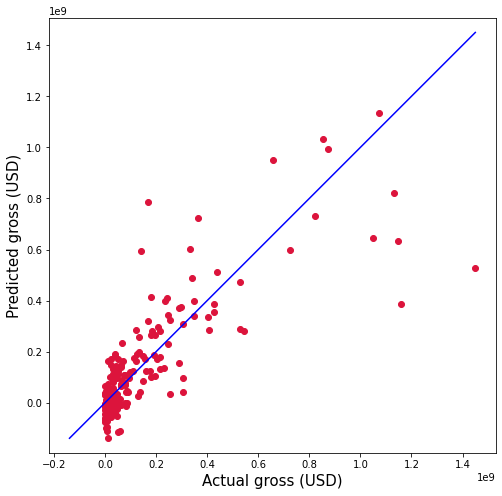

In [33]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions_test, c='crimson')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(predictions_test), max(y_test))
p2 = min(min(predictions_test), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual gross (USD)', fontsize=15)
plt.ylabel('Predicted gross (USD)', fontsize=15)
plt.axis('equal')
plt.show()

In [34]:
# Bar plot y_test vs predictions_test

df = pd.DataFrame({'Actual gross (USD)': y_test, 'Predicted gross (USD)': predictions_test})


,Actual gross (USD),Predicted gross (USD)
482,2.335510e+07,1.526989e+07
416,7.898648e+07,7.595622e+07
688,5.425148e+06,2.831155e+07
198,3.376679e+07,4.449894e+07
208,2.576990e+06,-4.639949e+07
644,2.967470e+07,1.125253e+08
357,2.750645e+07,-1.566310e+07
360,1.306149e+07,1.627259e+08
213,4.554416e+06,5.570560e+06
658,4.571006e+07,7.274496e+06


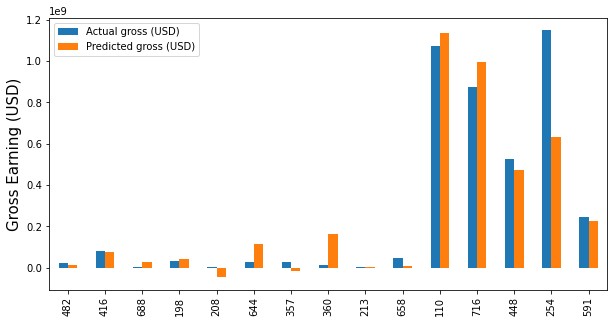

In [65]:
# by taking the 15 of them
df1 = df.sample(15)
display (df1)

#bar plot 
df1.plot(kind='bar',figsize=(10,5))
#plt.grid(which='major', linestyle= '-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel('Gross Earning (USD)', fontsize=15)
plt.show()

# Validation

In [38]:
movies_2022 = pd.read_csv('./movies_2022_treated.csv')


In [39]:
movies_2022.isna().sum().sum()

1

In [40]:
cols_object = ['release_year','release_month', 'release_weekday']

movies_2022[cols_object] = movies_2022[cols_object].astype(object)

In [41]:
X_val = movies_2022[['runtime_in_mins','imdb_rating', 'number_of_votes','metascore',
       'num_user_reviews', 'num_critic_reviews','budget_in_usd', 'total_award_nominations', 'total_award_wins',
       'primary_genre', 'secondary_genre', 'release_weekday', 'release_month','is_among_best_director',
       'top_production_company_grouped', 'country_of_origin_grouped']]

y_val= movies_2022['gross_worldwide_in_usd']

display(y_val.shape)
display(X_val.shape)

(52,)

(52, 16)

In [42]:
X_val = transform(X_val)


In [43]:
X_val.isna().sum().sum()

0

In [44]:
predictions_val = lm.predict(X_val)
r2_score(y_val, predictions_val)

0.6128860963504363

In [45]:
y_val[:10]


0    7.708362e+08
1    1.485758e+09
2    9.557758e+08
3    7.607553e+08
4    1.018418e+08
5    4.017488e+08
6    6.963311e+07
7    2.392686e+08
8    1.708231e+08
9    1.001136e+09
Name: gross_worldwide_in_usd, dtype: float64

In [46]:
predictions_val[:10]

array([9.53679872e+08, 7.45996288e+08, 8.22214656e+08, 8.57800704e+08,
       2.08207872e+08, 3.86596864e+08, 2.65027584e+08, 2.37830144e+08,
       3.94461184e+08, 4.81951744e+08])

In [47]:
r2_val, mse_val, mae_val, rmse_val = scores(lm, X_val, y_val)
print_metrics(r2_val, mse_val, mae_val, rmse_val)

Linear regression model metrics:
Mean squared error:  3.667104287425177e+16
Mean absolute error: 123521780.5
Root mean squared error: 191496848.20970753
r2: 0.6128860963504363


In [48]:
# Bar plot y_val vs predictions_val

df_val = pd.DataFrame({'Actual gross (USD)': y_val, 'Predicted gross (USD)': predictions_val})


In [49]:
# by taking the 15 of them
df_val_1 = df_val.sample(15)

In [50]:
df_val_1

,Actual gross (USD),Predicted gross (USD)
2,955775804.0,822214656.0
30,84774243.0,26542080.0
45,2156296.0,-1572864.0
13,167460961.0,311492608.0
42,34148750.0,204210176.0
20,51309115.0,163446784.0
15,140041405.0,129761280.0
17,29116320.0,94896128.0
38,92128123.0,129761280.0
51,51956868.0,135790592.0


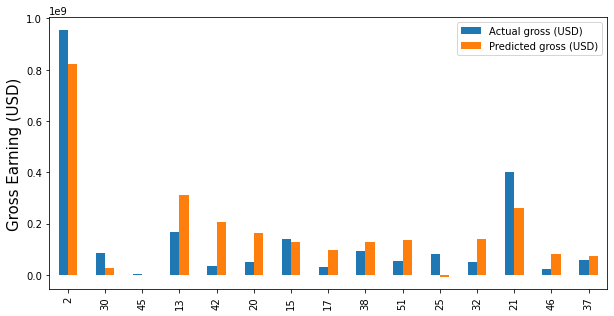

In [51]:
df_val_1.plot(kind='bar',figsize=(10,5))

#plt.grid(which='major', linestyle= '-', linewidth='0.5', color='green')

#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.ylabel('Gross Earning (USD)', fontsize=15)

plt.show()

